In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits,Average_Purchase
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,1,1,0,54,173,0,1190,15,1,602.5
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,5,1,0,63,174,0,577,18,5,297.5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,2,0,0,66,207,1,251,11,2,131.0
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,7,0,0,57,31,2,11,4,7,7.5
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,7,1,0,35,124,1,91,8,7,49.5


## Feature Engineering

In [15]:
features = df.drop(columns=['ID'])
features.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,Response,Complain,Age,Customer_Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits,Average_Purchase
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,...,1,1,0,54,173,0,1190,15,1,602.5
1,Graduation,Single,57091,0,0,0,464,5,64,7,...,5,1,0,63,174,0,577,18,5,297.5
2,Graduation,Married,67267,0,1,0,134,11,59,15,...,2,0,0,66,207,1,251,11,2,131.0
3,Graduation,Together,32474,1,1,0,10,0,1,0,...,7,0,0,57,31,2,11,4,7,7.5
4,Graduation,Single,21474,1,0,0,6,16,24,11,...,7,1,0,35,124,1,91,8,7,49.5


In [16]:
# Also encode Education and Marital_Status
features = pd.get_dummies(features, columns=['Education'], prefix='Education')
features = pd.get_dummies(features, columns=['Marital_Status'], prefix='Marital')
features.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow
0,84835,0,0,0,189,104,379,111,189,218,...,False,False,True,False,False,True,False,False,False,False
1,57091,0,0,0,464,5,64,7,0,37,...,False,False,True,False,False,False,False,True,False,False
2,67267,0,1,0,134,11,59,15,2,30,...,False,False,True,False,False,False,True,False,False,False
3,32474,1,1,0,10,0,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
4,21474,1,0,0,6,16,24,11,0,34,...,False,False,True,False,False,False,False,True,False,False


In [17]:
print(list(features.columns))


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Customer_Enrollment', 'Household', 'Total_Spent', 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow']


In [18]:
features.reset_index(inplace=True)

## Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
# X = features.drop(columns=['Response'], axis=1).iloc[:,1:][['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
#                                                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
#                                                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
#                                                  'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 
#                                                  'Age', 'Customer_Enrollment', 'Household', 'Total_Spent', 
#                                                  'Total_Purchases', 'Total_Visits', 'Average_Purchase', 
#                                                  'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 
#                                                  'Education_Master', 'Education_PhD', 'Marital_Divorced', 
#                                                  'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow',
#                                                  'Income']]
X = features.drop(columns=['Response'], axis=1).iloc[:,1:][['Complain', 
                                                 'Age', 'Customer_Enrollment', 'Household', 'Total_Spent', 
                                                 'Total_Purchases', 'Total_Visits', 'Average_Purchase', 
                                                 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 
                                                 'Education_Master', 'Education_PhD', 'Marital_Divorced', 
                                                 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow',
                                                 'Income']]
# X = features.drop(columns=['Response'], axis = 1)
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape
X_train.head()

,Complain,Age,Customer_Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits,Average_Purchase,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Income
1265,0,62,591,2,260,12,69,136.0,False,False,True,False,False,False,True,False,False,False,65316
277,0,54,535,0,981,13,14,497.0,False,False,True,False,False,False,True,False,False,False,72940
1776,0,52,362,1,860,17,96,438.5,False,False,True,False,False,False,True,False,False,False,74716
358,0,37,284,0,778,27,19,402.5,False,False,True,False,False,True,False,False,False,False,81361
1816,0,47,93,0,1423,18,94,720.5,False,False,True,False,False,False,False,True,False,False,85072


In [20]:
X_test.head()

,Complain,Age,Customer_Enrollment,Household,Total_Spent,Total_Purchases,Total_Visits,Average_Purchase,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Income
1259,0,59,531,2,42,6,71,24.0,False,False,True,False,False,False,True,False,False,False,44300
1623,0,64,827,1,819,23,88,421.0,False,False,True,False,False,False,False,False,True,False,62807
611,0,58,670,0,1093,21,33,557.0,False,False,True,False,False,True,False,False,False,False,70287
514,0,67,619,3,1019,25,30,522.0,False,False,False,False,True,False,True,False,False,False,75283
413,0,60,728,0,1895,17,28,956.0,False,False,True,False,False,False,False,True,False,False,61839


In [21]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

## Hyperparameter Optimization

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lg,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_scaled, y_train)

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='precision')

In [25]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.9382


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10)
GridSearch CV score on test set: 0.1386


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [26]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
lg = grid_search.best_estimator_
lg.fit(X_train_scaled, y_train)
lg_pred_train = lg.predict(X_train_scaled)
lg_pred_test = lg.predict(X_test_scaled)
lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)
print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(lg_prec_train))
print('Test set score: {:.4f}'.format(lg_prec_test))

Logistic Regression Accuracy: 0.8631
Logistic Regression Precision: 0.5091
Logistic Regression Recall: 0.3500
Logistic Regression F1: 0.4148
Logistic Regression AUC: 0.6478
Training set score: 0.9351
Test set score: 0.5091


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X_train_scaled, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) # lower CV score = does not result in improved performance

Cross-validation scores:[0.96363636 0.92608696 0.89754098 0.93965517 0.96412556]
Average cross-validation score: 0.9382


Confusion matrix

 [[470  27]
 [ 52  28]]

True Positives(TP) =  470

True Negatives(TN) =  28

False Positives(FP) =  27

False Negatives(FN) =  52


<Axes: >

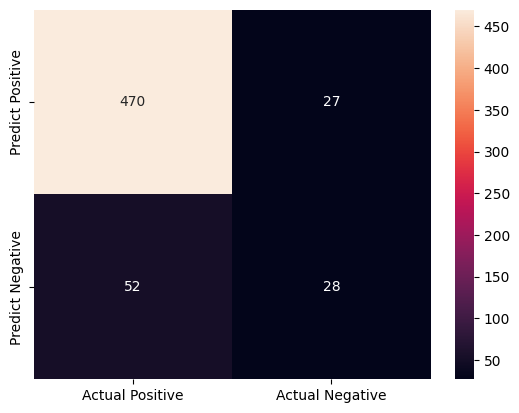

In [28]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred_test)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [30]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
print("Naive Bayes Accuracy: %.4f" % nb_acc)
print("Naive Bayes Precision: %.4f" % nb_prec)
print("Naive Bayes Recall: %.4f" % nb_rec)
print("Naive Bayes F1: %.4f" % nb_f1)
print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(nb_prec_train))
print('Test set score: {:.4f}'.format(nb_prec_test))

Naive Bayes Accuracy: 0.7418
Naive Bayes Precision: 0.2745
Naive Bayes Recall: 0.5250
Naive Bayes F1: 0.3605
Naive Bayes AUC: 0.6508
Training set score: 0.7260
Test set score: 0.2745


In [31]:
scores = cross_val_score(nb, X_train, y_train, cv = 5, scoring='precision')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean())) 

Cross-validation scores:[0.70224719 0.71717172 0.72115385 0.73933649 0.7539267 ]
Average cross-validation score: 0.7268


Confusion matrix

 [[386 111]
 [ 38  42]]

True Positives(TP) =  386

True Negatives(TN) =  42

False Positives(FP) =  111

False Negatives(FN) =  38


<Axes: >

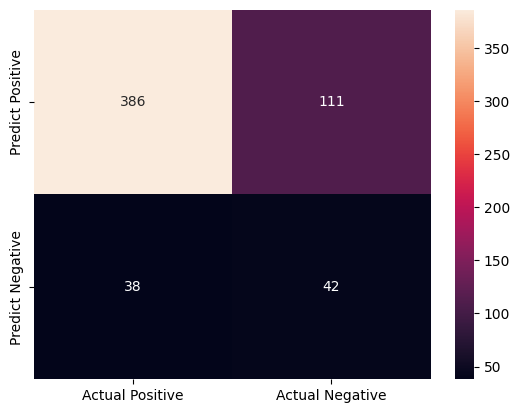

In [32]:
nb_cm = confusion_matrix(y_test, nb_pred_test)
print('Confusion matrix\n\n', nb_cm)
print('\nTrue Positives(TP) = ', nb_cm[0,0])
print('\nTrue Negatives(TN) = ', nb_cm[1,1])
print('\nFalse Positives(FP) = ', nb_cm[0,1])
print('\nFalse Negatives(FN) = ', nb_cm[1,0])
cm_matrix = pd.DataFrame(data=nb_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

## HyperParameter Optimization

In [34]:
# Define the parameter grid to search
parameters = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator = dt,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision')

In [35]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.8509


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=5)
GridSearch CV score on test set: 0.3273


In [36]:
dt = grid_search.best_estimator_
dt.fit(X_train,y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)
print("Decision Trees Accuracy: %.4f" % dt_acc)
print("Decision Trees Precision: %.4f" % dt_prec)
print("Decision Trees Recall: %.4f" % dt_rec)
print("Decision Trees F1: %.4f" % dt_f1)
print("Decision Trees AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(dt_prec_train))
print('Test set score: {:.4f}'.format(dt_prec_test))

Decision Trees Accuracy: 0.7903
Decision Trees Precision: 0.3186
Decision Trees Recall: 0.4500
Decision Trees F1: 0.3731
Decision Trees AUC: 0.6475
Training set score: 0.9593
Test set score: 0.3186


Confusion matrix

 [[420  77]
 [ 44  36]]

True Positives(TP) =  420

True Negatives(TN) =  36

False Positives(FP) =  77

False Negatives(FN) =  44


<Axes: >

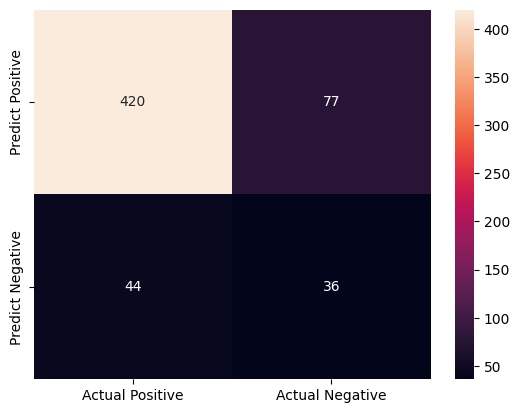

In [37]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
print('Confusion matrix\n\n', dt_cm)
print('\nTrue Positives(TP) = ', dt_cm[0,0])
print('\nTrue Negatives(TN) = ', dt_cm[1,1])
print('\nFalse Positives(FP) = ', dt_cm[0,1])
print('\nFalse Negatives(FN) = ', dt_cm[1,0])
cm_matrix = pd.DataFrame(data=dt_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

## HyperParameter Optimization

In [39]:
def compute_optimal_n_neighbors(X, y, n_neighbors_range, cv=5, scoring='precision'):
    mean_scores = []
    for n_neighbors in n_neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(knn, X, y, cv=cv, scoring=scoring)
        mean_scores.append(np.mean(scores))
    optimal_n_neighbors = n_neighbors_range[np.argmax(mean_scores)]
    return optimal_n_neighbors, mean_scores
optimal_n_neighbors, mean_scores = compute_optimal_n_neighbors(X_train_scaled, y_train, n_neighbors_range=[3, 5, 7, 9, 11])
print("Optimal number of neighbors:", optimal_n_neighbors)
print("Mean cross-validation scores:", mean_scores)

Optimal number of neighbors: 7
Mean cross-validation scores: [0.890044473591335, 0.9085581840055825, 0.9133284148978206, 0.904947805197064, 0.8996508485439769]


In [40]:
# Define the parameter grid to search
parameters = {
    'n_neighbors': [optimal_n_neighbors],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric used for the tree
}
grid_search = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [41]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.9198


Parameters that give the best results : 

 {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
GridSearch CV score on test set: 0.3733


In [42]:
knn = grid_search.best_estimator_
knn.fit(X_train_scaled,y_train)
knn_pred_train = knn.predict(X_train_scaled)
knn_pred_test = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)
print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
print("k-Nearest Neighbors F1: %.4f" % knn_f1)
print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(knn_prec_train))
print('Test set score: {:.4f}'.format(knn_prec_test))

k-Nearest Neighbors Accuracy: 0.8284
k-Nearest Neighbors Precision: 0.3733
k-Nearest Neighbors Recall: 0.3500
k-Nearest Neighbors F1: 0.3613
k-Nearest Neighbors AUC: 0.6277
Training set score: 1.0000
Test set score: 0.3733


Confusion matrix

 [[450  47]
 [ 52  28]]

True Positives(TP) =  450

True Negatives(TN) =  28

False Positives(FP) =  47

False Negatives(FN) =  52


<Axes: >

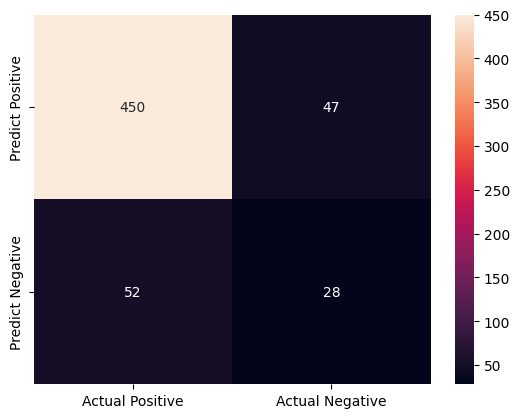

In [43]:
knn_cm = confusion_matrix(y_test, knn_pred_test)
print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) = ', knn_cm[0,0])
print('\nTrue Negatives(TN) = ', knn_cm[1,1])
print('\nFalse Positives(FP) = ', knn_cm[0,1])
print('\nFalse Negatives(FN) = ', knn_cm[1,0])
cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Support Vector Machines

In [44]:
from sklearn.svm import SVC
svm=SVC() 
svm.fit(X_train,y_train)

SVC()

## Hyperparameter Optimization

In [45]:
from sklearn.metrics import make_scorer
# param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]
# grid_search = GridSearchCV(estimator = svm,  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)
# grid_search.fit(X_train, y_train)



scorer = make_scorer(precision_score, average='binary', zero_division=0)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}

# param_grid = {
#     'C': [0.1, 1, 10, 100], 
#     'gamma': [1, 0.1, 0.01, 0.001], 
#     'kernel': ['linear', 'rbf'] 
# }
grid_search = GridSearchCV(estimator=svm, scoring=scorer, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring=make_scorer(precision_score, response_method='predict', average=binary, zero_division=0))

In [46]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

GridSearch CV best score : 0.9701


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.01)
GridSearch CV score on test set: 0.6250


In [47]:
svm = grid_search.best_estimator_
svm.fit(X_train_scaled,y_train)
svm_pred_train = svm.predict(X_train_scaled)
svm_pred_test = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)
print("Support Vector Machines Accuracy: %.4f" % svm_acc)
print("Support Vector Machines Precision: %.4f" % svm_prec)
print("Support Vector Machines Recall: %.4f" % svm_rec)
print("Support Vector Machines F1: %.4f" % svm_f1)
print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(svm_prec_train))
print('Test set score: {:.4f}'.format(svm_prec_test))

Support Vector Machines Accuracy: 0.8752
Support Vector Machines Precision: 0.6250
Support Vector Machines Recall: 0.2500
Support Vector Machines F1: 0.3571
Support Vector Machines AUC: 0.6129
Training set score: 0.9831
Test set score: 0.6250


Confusion matrix

 [[485  12]
 [ 60  20]]

True Positives(TP) =  485

True Negatives(TN) =  20

False Positives(FP) =  12

False Negatives(FN) =  60


<Axes: >

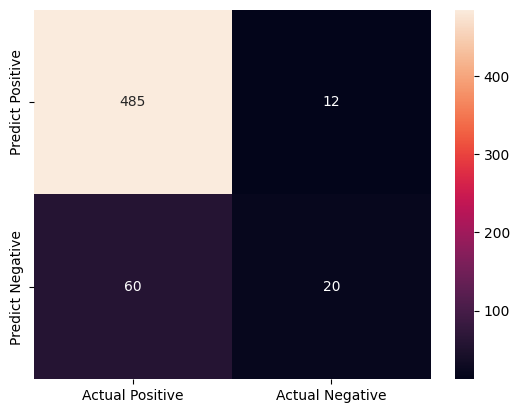

In [48]:
svm_cm = confusion_matrix(y_test, svm_pred_test)
print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) = ', svm_cm[0,0])
print('\nTrue Negatives(TN) = ', svm_cm[1,1])
print('\nFalse Positives(FP) = ', svm_cm[0,1])
print('\nFalse Negatives(FN) = ', svm_cm[1,0])
cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')